# Yuki Tsunoda
<img src="https://www.formula1.com/content/fom-website/en/drivers/yuki-tsunoda/_jcr_content/image.img.1920.medium.jpg/1641829679198.jpg" width="300">

### Team: AlphaTauri
<img src ="https://www.formula1.com/content/fom-website/en/drivers/yuki-tsunoda/_jcr_content/helmet.img.png/1646824917377.png" width="200">


In [1]:
library (tidyverse)
library (tidymodels)
source("source/master_functions.r")
source("source/regression.r")
source("source/prediction.r")
set.seed(620)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
initialize_master()

Parsed with column specification:
cols(
  circuitId = col_double(),
  circuitRef = col_character(),
  name = col_character(),
  location = col_character(),
  country = col_character(),
  lat = col_double(),
  lng = col_double(),
  alt = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  constructorStandingsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  position = col_double(),
  positionText = col_character(),
  wins = col_double()
)

Parsed with column specification:
cols(
  constructorResultsId = col_double(),
  raceId = col_double(),
  constructorId = col_double(),
  points = col_double(),
  status = col_character()
)

Parsed with column specification:
cols(
  constructorId = col_double(),
  constructorRef = col_character(),
  name = col_character(),
  nationality = col_character(),
  url = col_character()
)

Parsed with column specification:
cols(
  driverId = col_double(),
  driverRef = col_

In [3]:
# Filtering Lap Data For 2022 Drivers

lap_data <- lap_times %>%
            filter(driverId %in% driver_ids) %>%
            filter(raceId %in% race_ids)

tsu_laps <- lap_data %>%
            filter(driverId == 852)

# Filtering Lap Data for ALFA TAURI
tauri_lap <- lap_data %>%
             filter(driverId %in% c(826, 843))

# Season Analysis

In [4]:
rmse_col <- data.frame(.metric = character(), .estimator = character(), .estimate = double(), Round = double(), stringsAsFactors=FALSE) 

racetime_col <- data.frame(race_time_milliseconds = double(), race_time_mins = double(), race_time_hrs = double()) 

rmse_col

racetime_col

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>


race_time_milliseconds,race_time_mins,race_time_hrs
<dbl>,<dbl>,<dbl>


`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



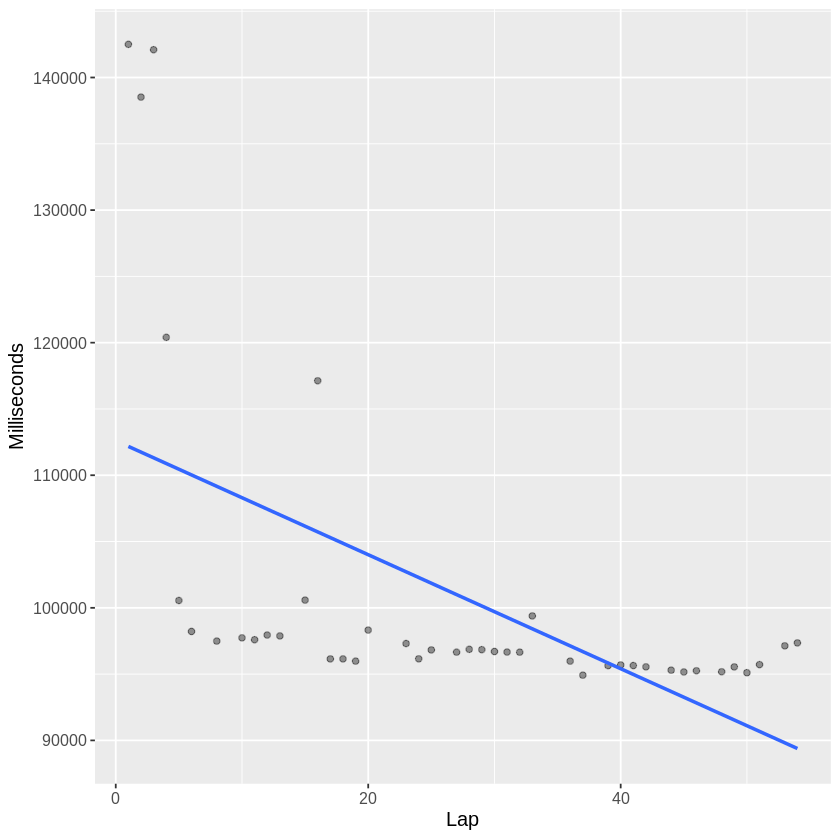

In [5]:
set.seed(2022)

#1. Bahrain 

yt_bahrain <- tsu_laps %>%
                filter(raceId %in% bahrain_race_ID) 

yt_bahrain_clean <- yt_bahrain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))

yt_bahrain_clean_ID <- yt_bahrain_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_bahrain_races <- tsu_laps %>%
                    filter(raceId %in% yt_bahrain_clean_ID)

formulaone_split <- initial_split(yt_bahrain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 1

initiate_rmse() 

### GETS PREDICTION

get_bahrain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1054,65


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



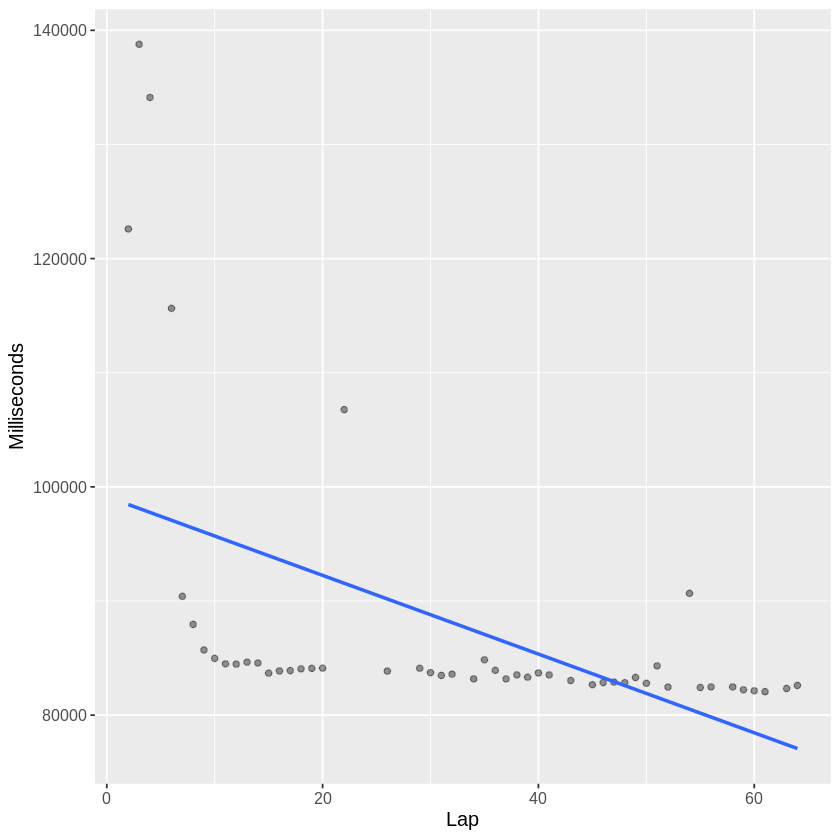

In [6]:
set.seed(2022)

#2. Portimão

yt_Portimão <- tsu_laps %>%
                filter(raceId %in% Portimão_race_ID) 

yt_Portimão_clean <- yt_Portimão %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_Portimão_clean
yt_Portimão_clean_ID <- yt_Portimão_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_Portimão_races <- tsu_laps %>%
                    filter(raceId %in% yt_Portimão_clean_ID) 

formulaone_split <- initial_split(yt_Portimão_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 2

initiate_rmse() 

### GETS PREDICTION

get_Portimão_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
900,57
989,57
1010,57
969,56


`geom_smooth()` using formula 'y ~ x'



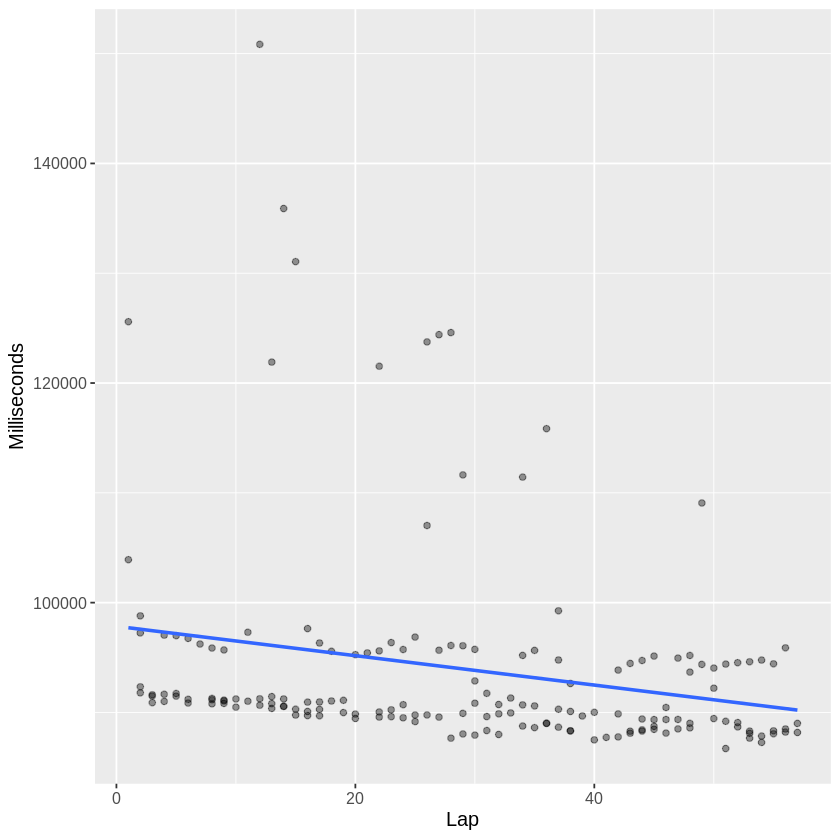

In [7]:
set.seed(2022)

#3. Australia

yt_aus <- tauri_lap %>%
                filter(raceId %in% aus_race_ID) 

yt_aus_clean <- yt_aus %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_aus_clean
yt_aus_clean_ID <- yt_aus_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_aus_races <- tauri_lap %>%
                    filter(raceId %in% yt_aus_clean_ID)

formulaone_split <- initial_split(yt_aus_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression() 

round_n <- 3

initiate_rmse() 

## GETS PREDICTION

get_australia_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



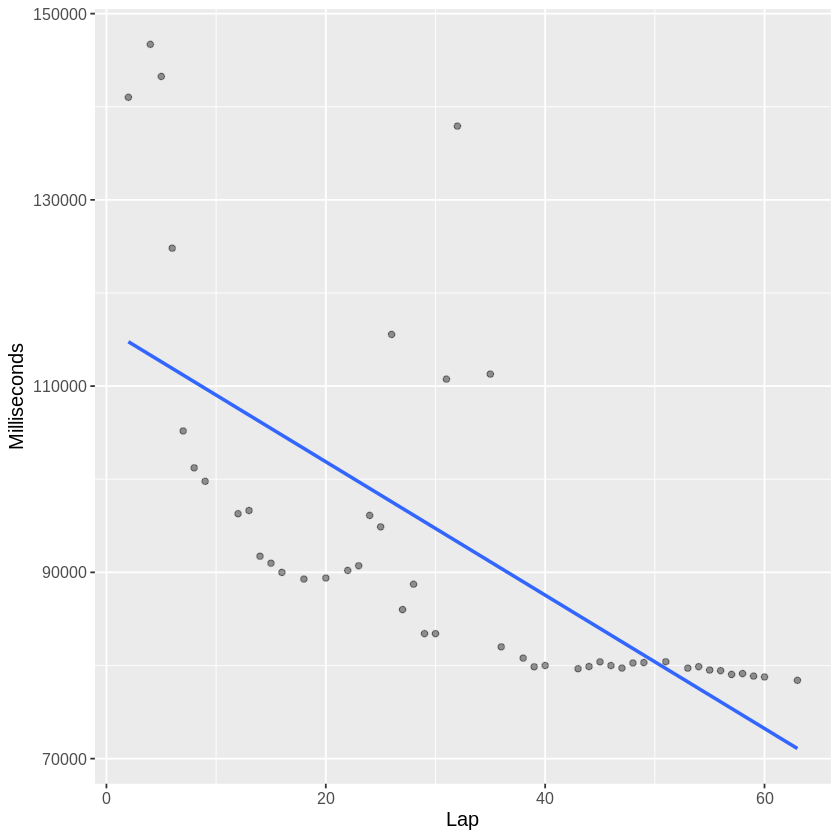

In [8]:
set.seed(2022)

#4. Italy, Imola

yt_imola <- tsu_laps %>%
                filter(raceId %in% imola_race_ID) 

yt_imola_clean <- yt_imola %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

yt_imola_clean_ID <- yt_imola_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_imola_races <- tsu_laps %>%
                    filter(raceId %in% yt_imola_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(yt_imola_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 4

initiate_rmse() 

### GETS PREDICTION

get_imola_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



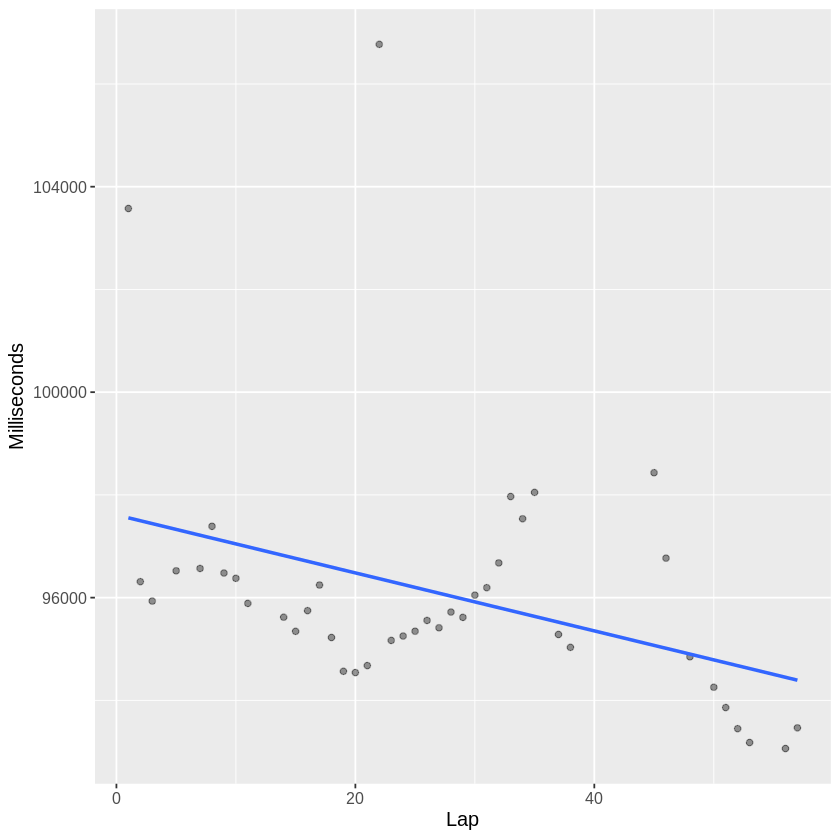

In [9]:
set.seed(2022)

#5. Turkey (Replacing Miami)

yt_turkey <- tsu_laps %>%
                filter(raceId %in% turkey_race_ID) 

yt_turkey_clean <- yt_turkey %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

yt_turkey_clean_ID <- yt_turkey_clean %>%
                        pull(raceId)

### SPLITTING DATA

yt_turkey_races <- tsu_laps %>%
                    filter(raceId %in% yt_turkey_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(yt_turkey_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 5

initiate_rmse() 

### GETS PREDICTION

get_miami_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



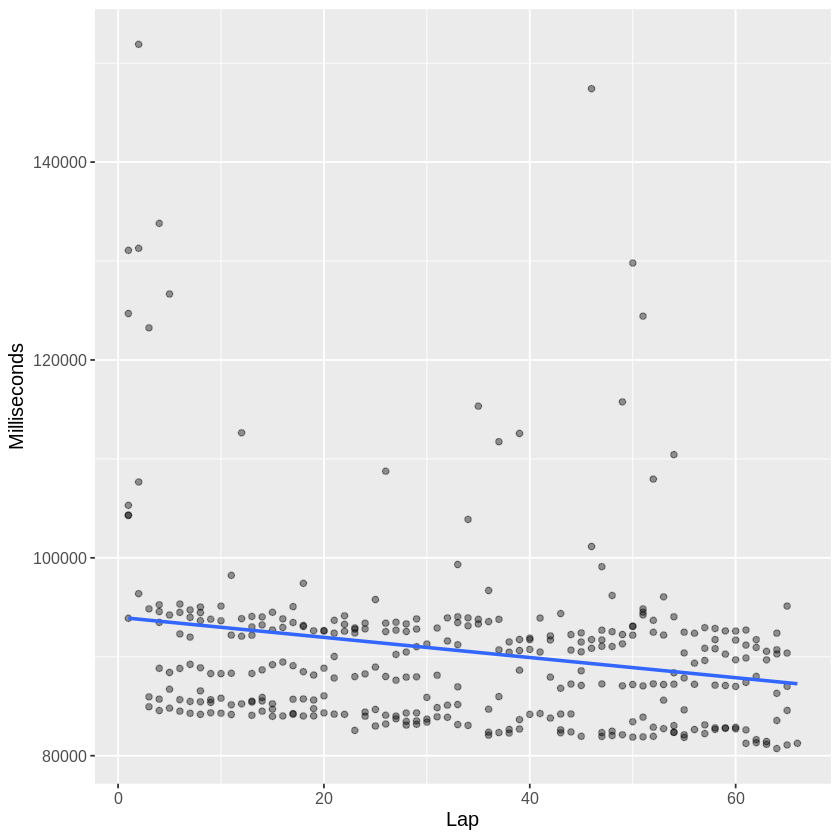

In [10]:
set.seed(2022)

#6. Spain

yt_spain <- tauri_lap %>%
                filter(raceId %in% spain_race_ID) 

yt_spain_clean <- yt_spain %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

yt_spain_clean_ID <- yt_spain_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_spain_races <- tauri_lap %>%
                    filter(raceId %in% yt_spain_clean_ID)

formulaone_split <- initial_split(yt_spain_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 6

initiate_rmse() 

### GETS PREDICTION

get_spain_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1056,77


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



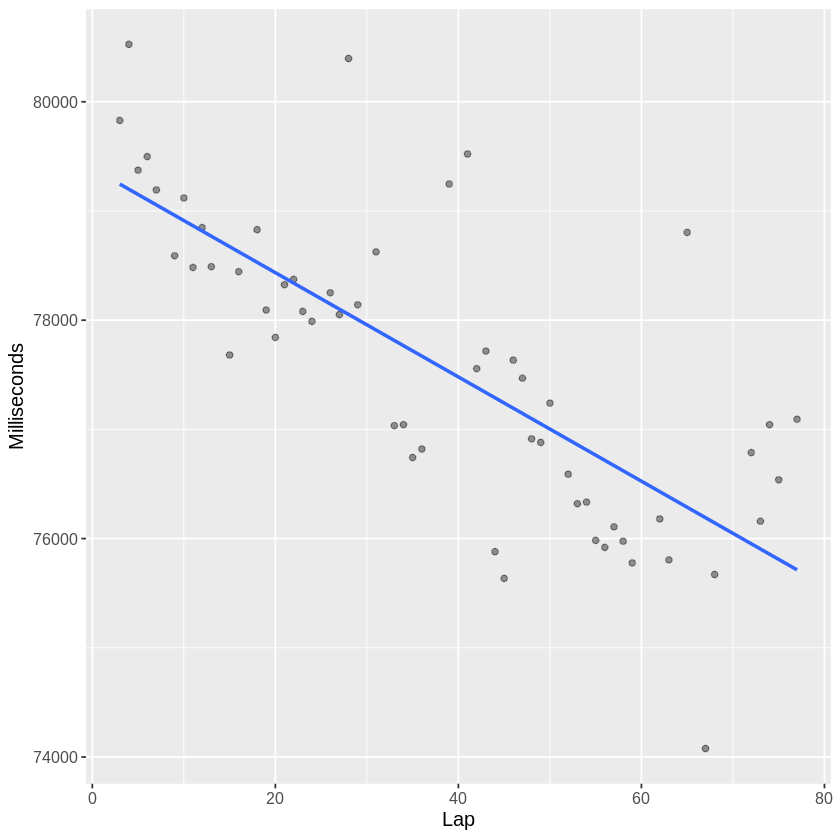

In [11]:
set.seed(2022)

#7. Monaco

yt_monaco <- tsu_laps %>%
                filter(raceId %in% monaco_race_ID) 

yt_monaco_clean <- yt_monaco %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_monaco_clean
yt_monaco_clean_ID <- yt_monaco_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_monaco_races <- tsu_laps %>%
                    filter(raceId %in% yt_monaco_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(yt_monaco_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 7

initiate_rmse() 

### GETS PREDICTION

get_monaco_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1057,51


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



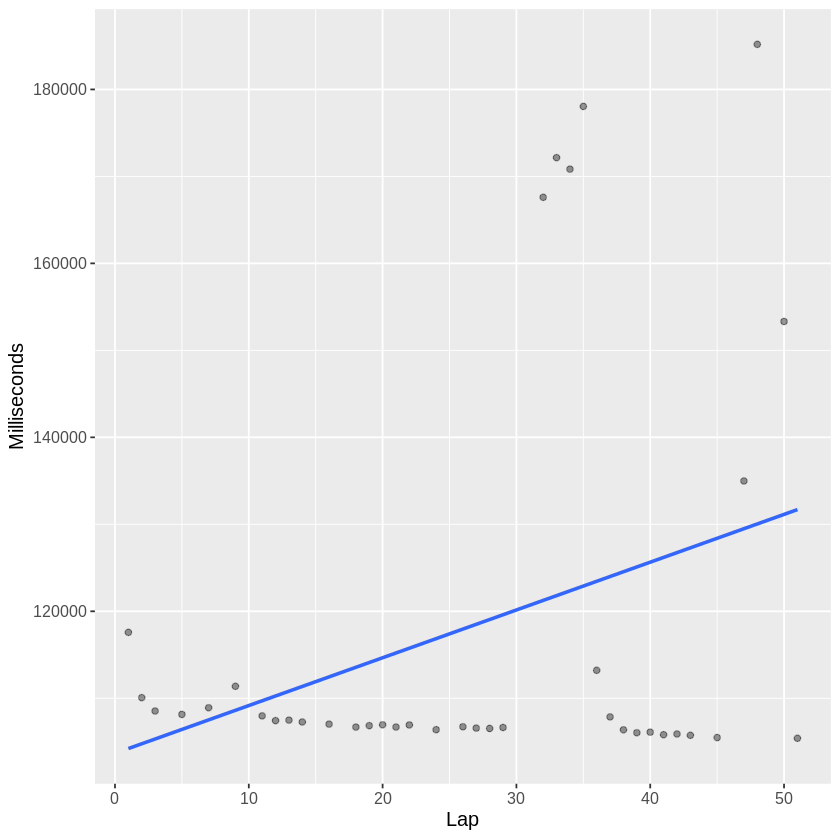

In [12]:
set.seed(2022)

#8. Azerbaijan

yt_azerbaijan <- tsu_laps %>%
                filter(raceId %in% azerbaijan_race_ID) 

yt_azerbaijan_clean <- yt_azerbaijan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_azerbaijan_clean
yt_azerbaijan_clean_ID <- yt_azerbaijan_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_azerbaijan_races <- tsu_laps %>%
                    filter(raceId %in% yt_azerbaijan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(yt_azerbaijan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 8

initiate_rmse() 

### GETS PREDICTION

get_azerbaijan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
932,69
954,69
1016,69
975,54
906,47


`geom_smooth()` using formula 'y ~ x'



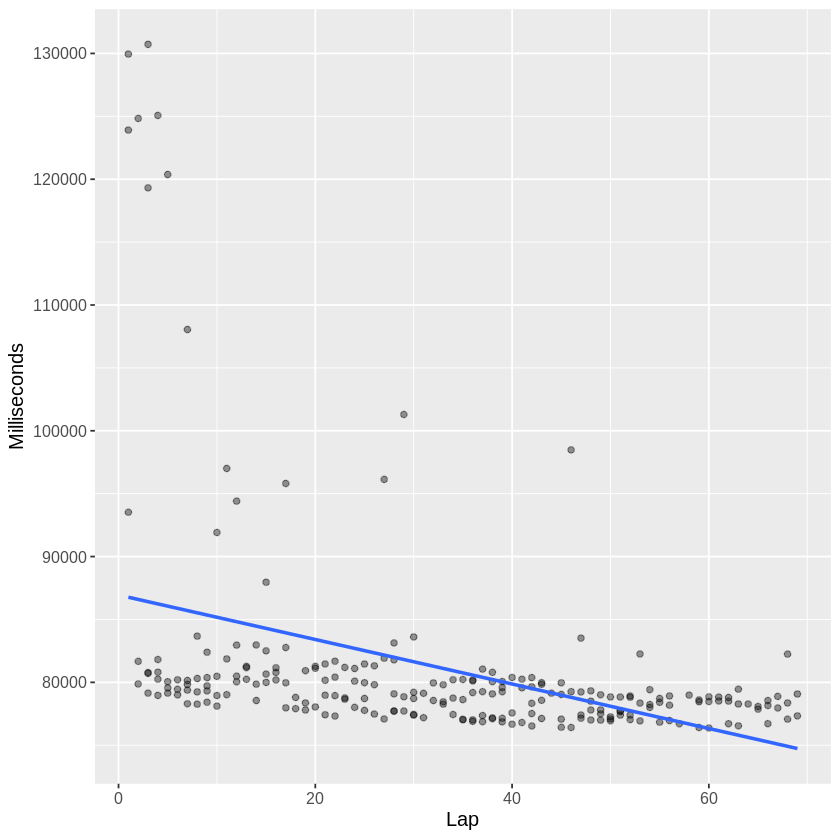

In [13]:
set.seed(2022)

#9. Canada

yt_canada <- tauri_lap %>%
                filter(raceId %in% canada_race_ID) 

yt_canada_clean <- yt_canada %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_canada_clean
yt_canada_clean_ID <- yt_canada_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_canada_races <- tauri_lap %>%
                    filter(raceId %in% yt_canada_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(yt_canada_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 9

initiate_rmse() 

## GETS PREDICTION

get_canada_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1061,52


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



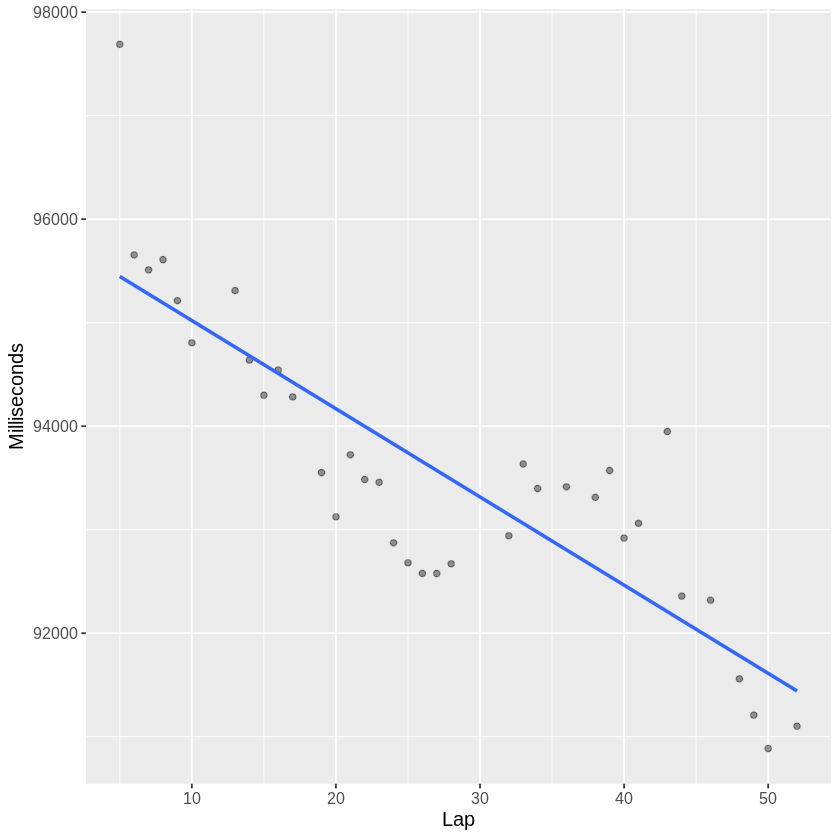

In [14]:
set.seed(2022)

#10. Great Britain

yt_uk <- tsu_laps %>%
                filter(raceId %in% uk_race_ID) 

yt_uk_clean <- yt_uk %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_uk_clean
yt_uk_clean_ID <- yt_uk_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_uk_races <- tsu_laps %>%
                    filter(raceId %in% yt_uk_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(6:598)

formulaone_split <- initial_split(yt_uk_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 10

initiate_rmse() 

### GETS PREDICTION

get_uk_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1058,70
1060,70


`geom_smooth()` using formula 'y ~ x'



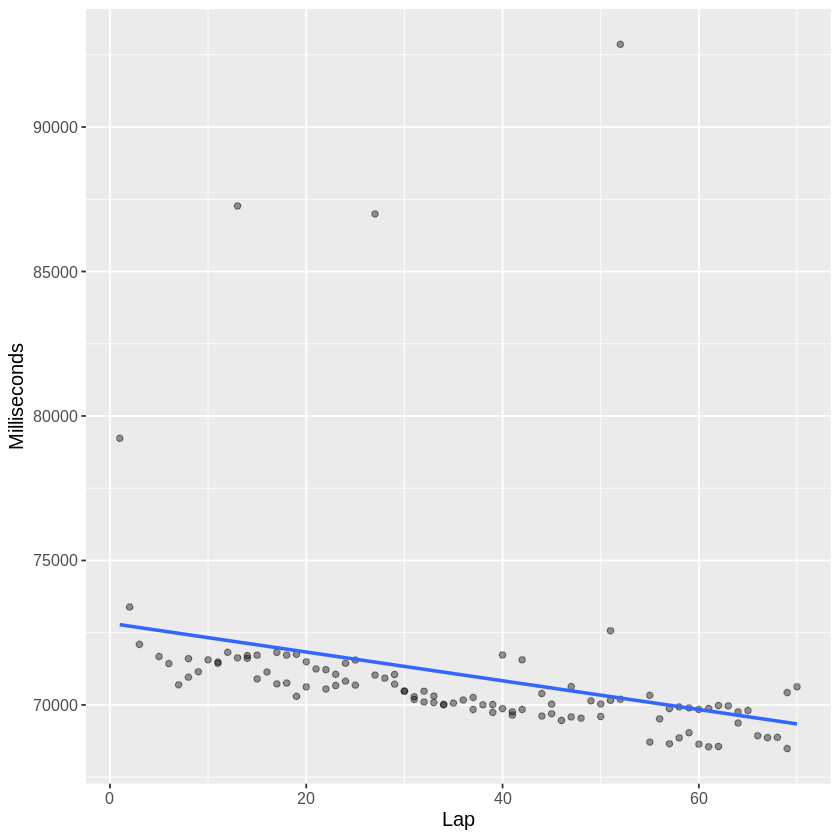

In [15]:
set.seed(2022)

#11. Austria

yt_austria <- tsu_laps %>%
                filter(raceId %in% austria_race_ID) 

yt_austria_clean <- yt_austria %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_austria_clean
yt_austria_clean_ID <- yt_austria_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_austria_races <- tsu_laps %>%
                    filter(raceId %in% yt_austria_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(4:1000)

formulaone_split <- initial_split(yt_austria_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 11

initiate_rmse() 

### GETS PREDICTION

get_austria_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
996,52
1017,52


`geom_smooth()` using formula 'y ~ x'



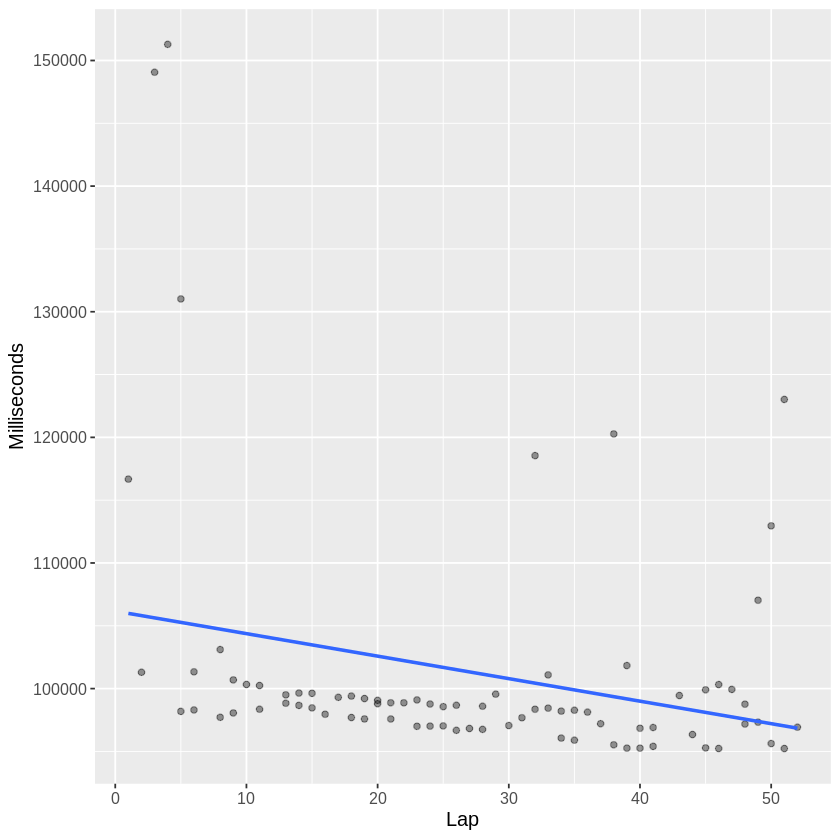

In [16]:
set.seed(2022)

#12. France

yt_france <- tauri_lap %>%
                filter(raceId %in% france_race_ID) 

yt_france_clean <- yt_france %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_france_clean
yt_france_clean_ID <- yt_france_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_france_races <- tauri_lap %>%
                    filter(raceId %in% yt_france_clean_ID)

formulaone_split <- initial_split(yt_france_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 12

initiate_rmse() 

### GETS PREDICTION

get_france_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1062,70


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



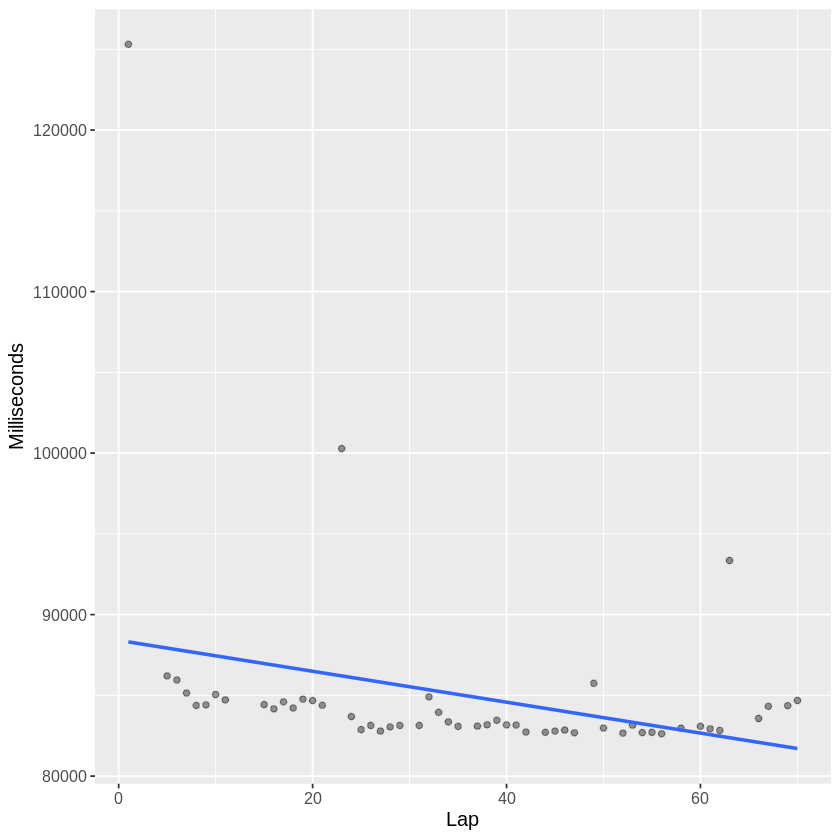

In [17]:
set.seed(2022)

#13. Hungary

yt_hungary <- tsu_laps %>%
                filter(raceId %in% hungary_race_ID) 

yt_hungary_clean <- yt_hungary %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))                      
yt_hungary_clean
yt_hungary_clean_ID <- yt_hungary_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_hungary_races <- tsu_laps %>%
                    filter(raceId %in% yt_hungary_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>% 
                    slice(3:598)

formulaone_split <- initial_split(yt_hungary_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 13

initiate_rmse() 

### GETS PREDICTION

get_hungary_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
911,44
960,44
980,44
1022,44
1037,44
937,43
1001,43


`geom_smooth()` using formula 'y ~ x'



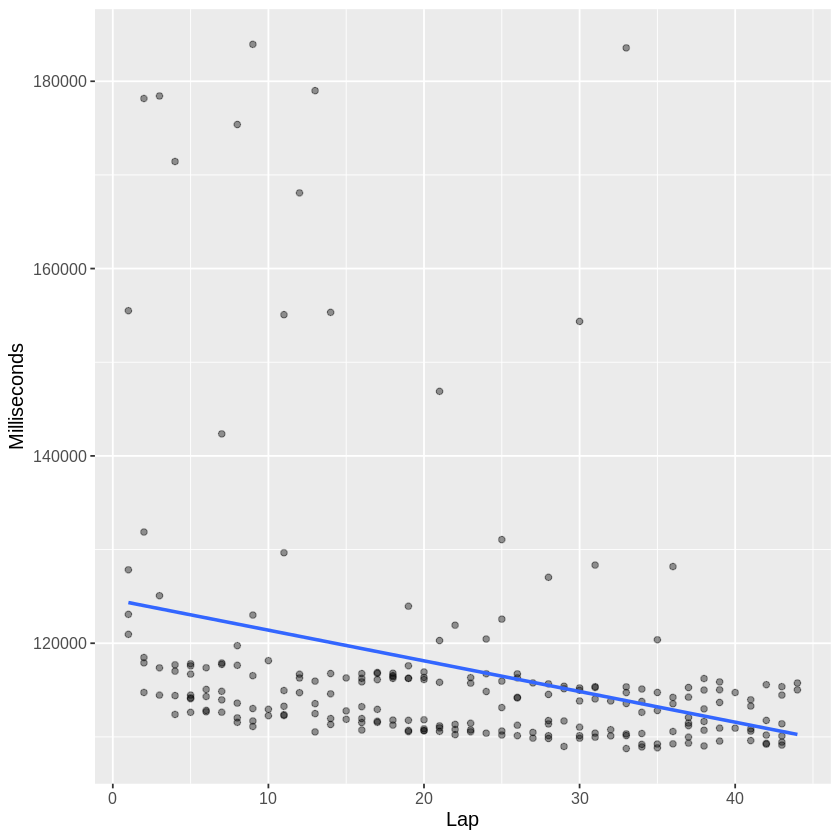

In [18]:
set.seed(2022)

#14. Belgium

yt_belgium <- tauri_lap %>%
                filter(raceId %in% belgium_race_ID) 

yt_belgium_clean <- yt_belgium %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_belgium_clean
yt_belgium_clean_ID <- yt_belgium_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_belgium_races <- tauri_lap %>%
                    filter(raceId %in% yt_belgium_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(yt_belgium_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 14

initiate_rmse() 

## GETS PREDICTION

get_belgium_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1064,48


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



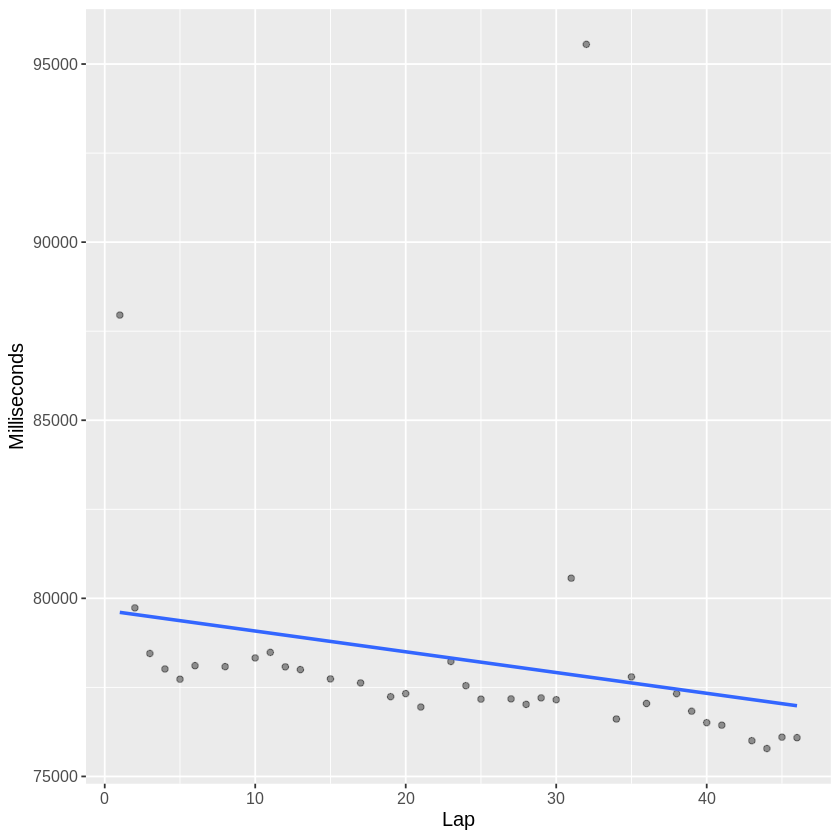

In [19]:
set.seed(2022)

#15. Netherlands

yt_netherlands <- tsu_laps %>%
                filter(raceId %in% netherlands_race_ID) 

yt_netherlands_clean <- yt_netherlands %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_netherlands_clean
yt_netherlands_clean_ID <- yt_netherlands_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_netherlands_races <- tsu_laps %>%
                    filter(raceId %in% yt_netherlands_clean_ID)

formulaone_split <- initial_split(yt_netherlands_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 15

initiate_rmse() 

### GETS PREDICTION

get_netherlands_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
912,53
1038,53
938,52
981,52
961,36
1023,29


`geom_smooth()` using formula 'y ~ x'



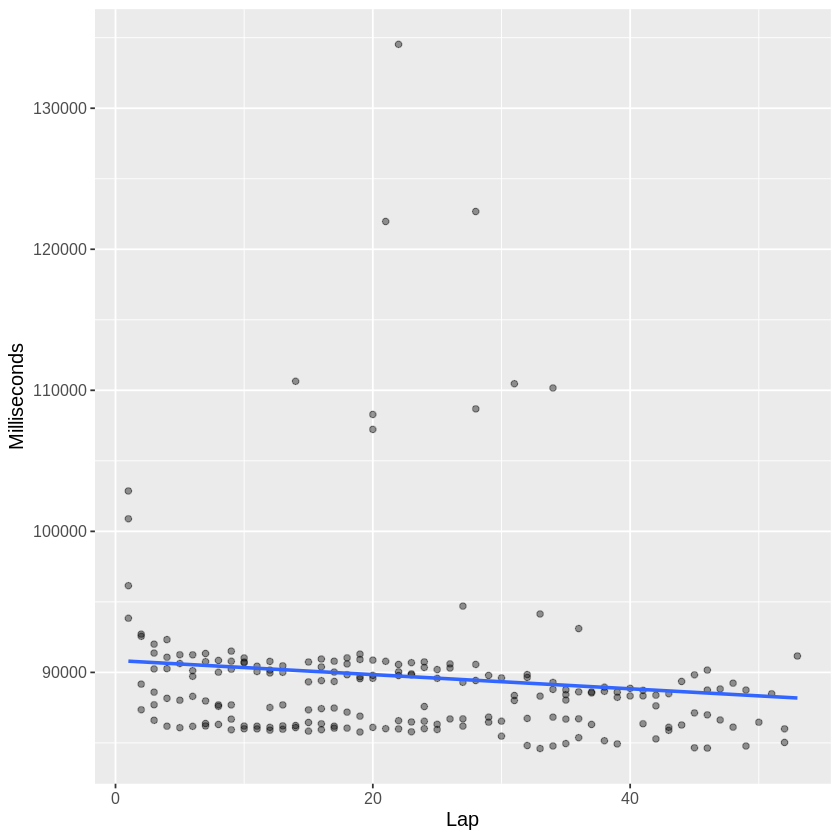

In [20]:
set.seed(2022)

#16. Italy, Monza

yt_monza <- tauri_lap %>%
                filter(raceId %in% monza_race_ID) 

yt_monza_clean <- yt_monza %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))
yt_monza_clean
yt_monza_clean_ID <- yt_monza_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_monza_races <- tauri_lap %>%
                    filter(raceId %in% yt_monza_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(3:1000)

formulaone_split <- initial_split(yt_monza_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 16

initiate_rmse() 

## GETS PREDICTION

get_monza_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
939,61
962,61
1024,61
913,60
1003,60
982,10


`geom_smooth()` using formula 'y ~ x'



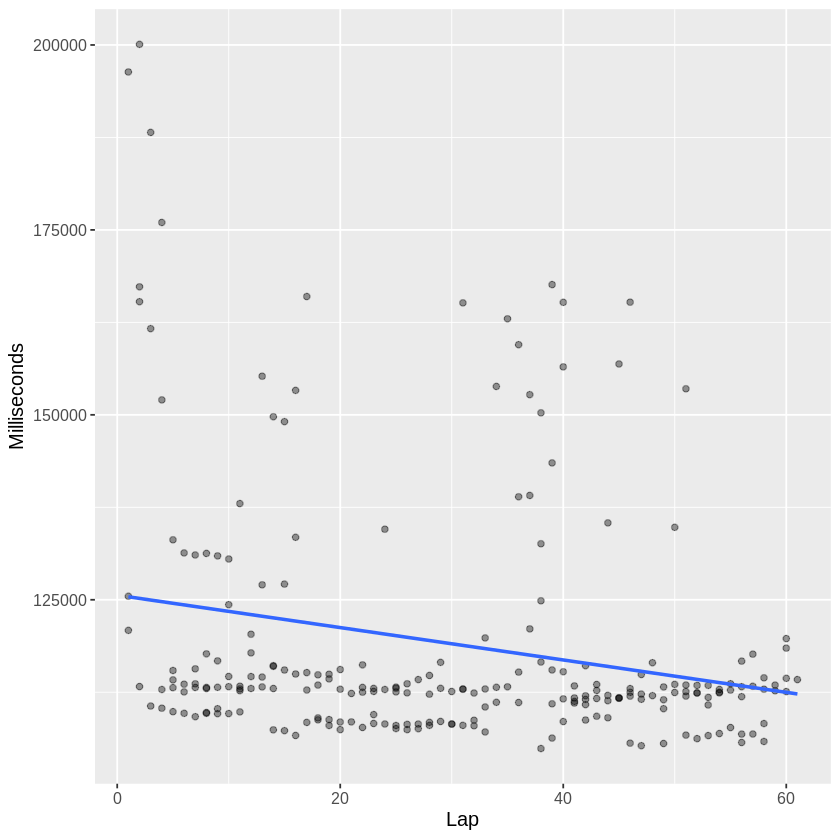

In [21]:
set.seed(2022)

#17. Singapore

yt_singapore <- tauri_lap %>%
                filter(raceId %in% singapore_race_ID) 

yt_singapore_clean <- yt_singapore %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_singapore_clean
yt_singapore_clean_ID <- yt_singapore_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_singapore_races <- tauri_lap %>%
                    filter(raceId %in% yt_singapore_clean_ID)

formulaone_split <- initial_split(yt_singapore_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 17

initiate_rmse() 

## GETS PREDICTION

get_singapore_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



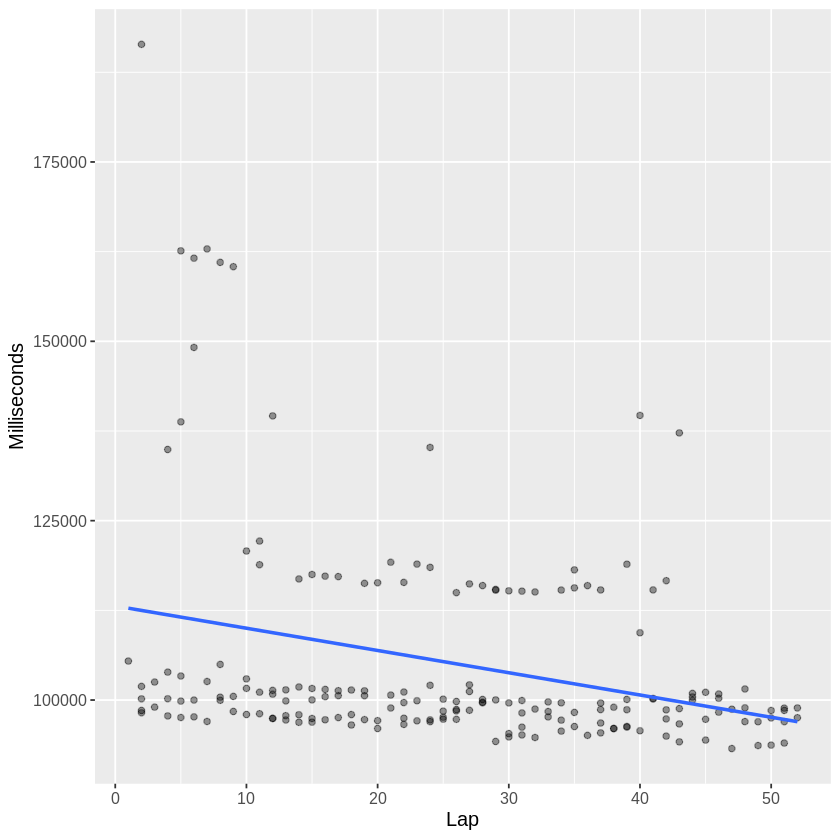

In [22]:
set.seed(2022)

#18. Japan

yt_japan <- tauri_lap %>%
                filter(raceId %in% japan_race_ID) 

yt_japan_clean <- yt_japan %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n))

yt_japan_clean_ID <- yt_japan_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_japan_races <- tauri_lap %>%
                    filter(raceId %in% yt_japan_clean_ID) %>%
                    arrange(by = desc(milliseconds)) %>%
                    slice(2:1000)

formulaone_split <- initial_split(yt_japan_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 18

initiate_rmse() 

## GETS PREDICTION

get_japan_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1069,55


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 2 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



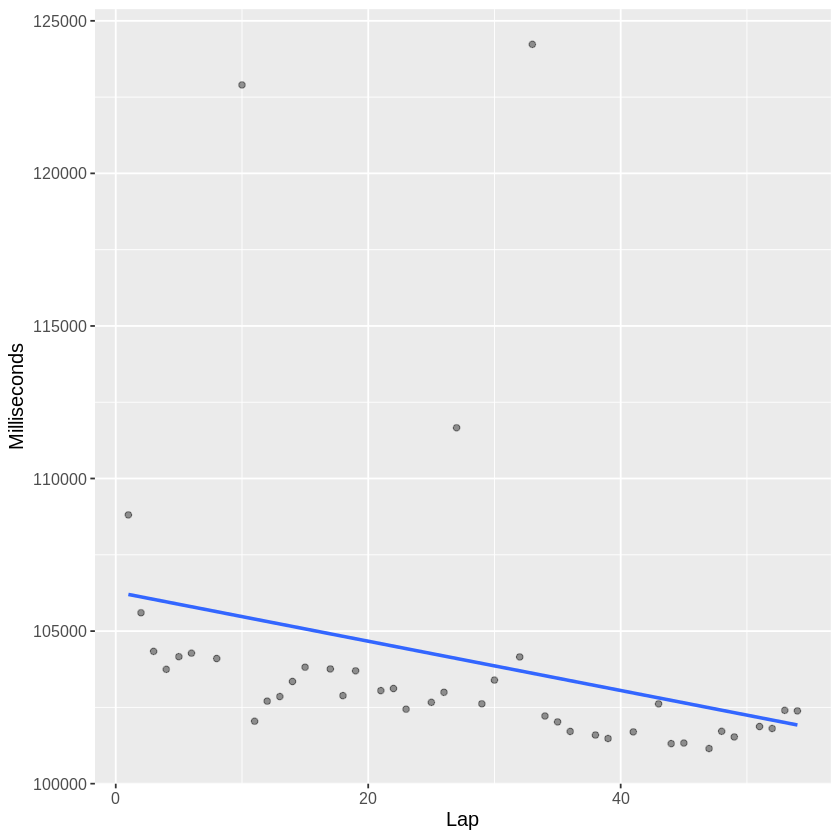

In [23]:
set.seed(2022)

#19. USA, Austin

yt_austin <- tsu_laps %>%
                filter(raceId %in% austin_race_ID) 

yt_austin_clean <- yt_austin %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_austin_clean
yt_austin_clean_ID <- yt_austin_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_austin_races <- tsu_laps %>%
                    filter(raceId %in% yt_austin_clean_ID)

formulaone_split <- initial_split(yt_austin_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 19

initiate_rmse() 

### GETS PREDICTION

 get_austin_prediction()

`summarise()` ungrouping output (override with `.groups` argument)

`geom_smooth()` using formula 'y ~ x'



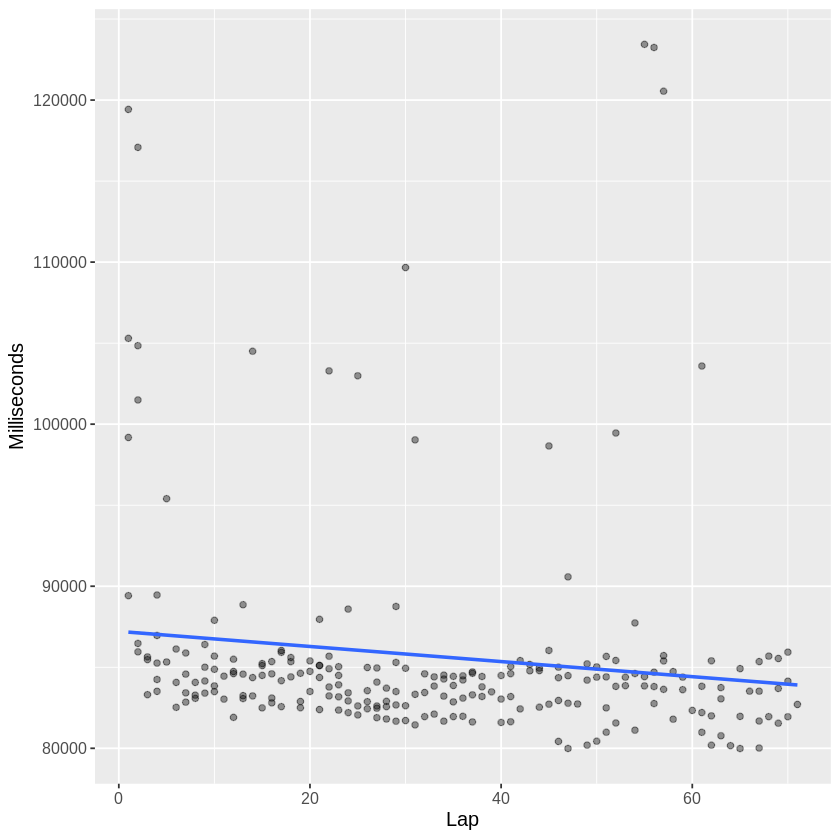

In [24]:
set.seed(2022)

#20. Mexico

yt_mexico <- tauri_lap %>%
                filter(raceId %in% mexico_race_ID) 

yt_mexico_clean <- yt_mexico %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 

yt_mexico_clean_ID <- yt_mexico_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_mexico_races <- tauri_lap %>%
                    filter(raceId %in% yt_mexico_clean_ID)

formulaone_split <- initial_split(yt_mexico_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 20

initiate_rmse() 

## GETS PREDICTION

get_mexico_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
1071,70


Warning message:
“The number of observations in each quantile is below the recommended threshold of 20. Stratification will be done with 3 breaks instead.”
`geom_smooth()` using formula 'y ~ x'



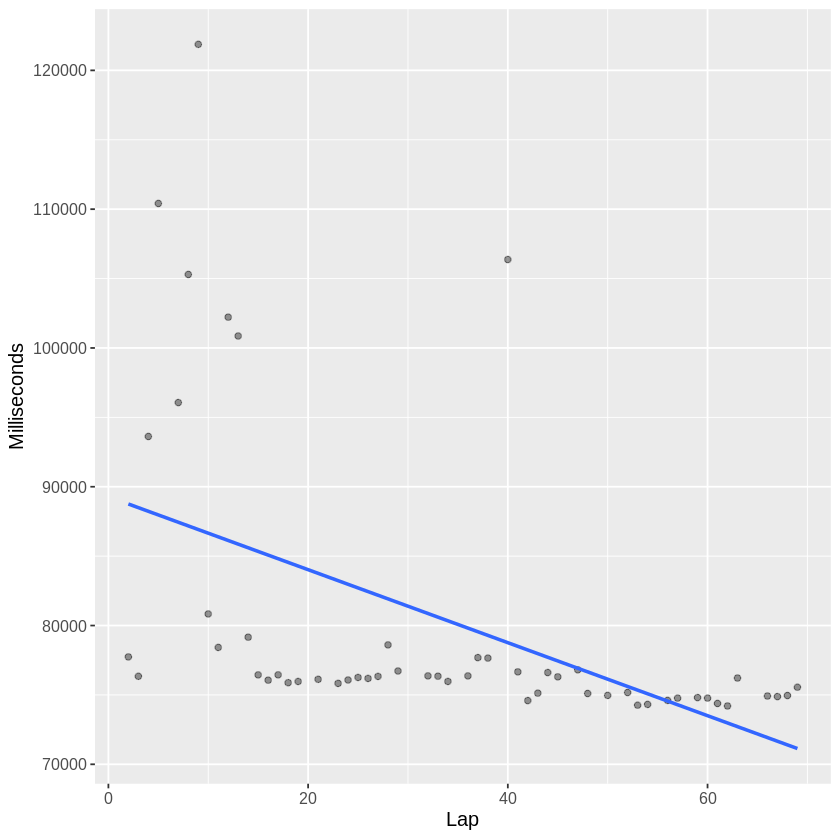

In [25]:
set.seed(2022)

#21. Brazil

yt_brazil <- tsu_laps %>%
                filter(raceId %in% brazil_race_ID) 

yt_brazil_clean <- yt_brazil %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_brazil_clean
yt_brazil_clean_ID <- yt_brazil_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_brazil_races <- tsu_laps %>%
                    filter(raceId %in% yt_brazil_clean_ID)

formulaone_split <- initial_split(yt_brazil_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 21

initiate_rmse() 

### GETS PREDICTION

 get_brazil_prediction()

`summarise()` ungrouping output (override with `.groups` argument)



raceId,n
<dbl>,<int>
945,55
988,54
1009,54
1030,54
1047,54
918,14
968,14


`geom_smooth()` using formula 'y ~ x'



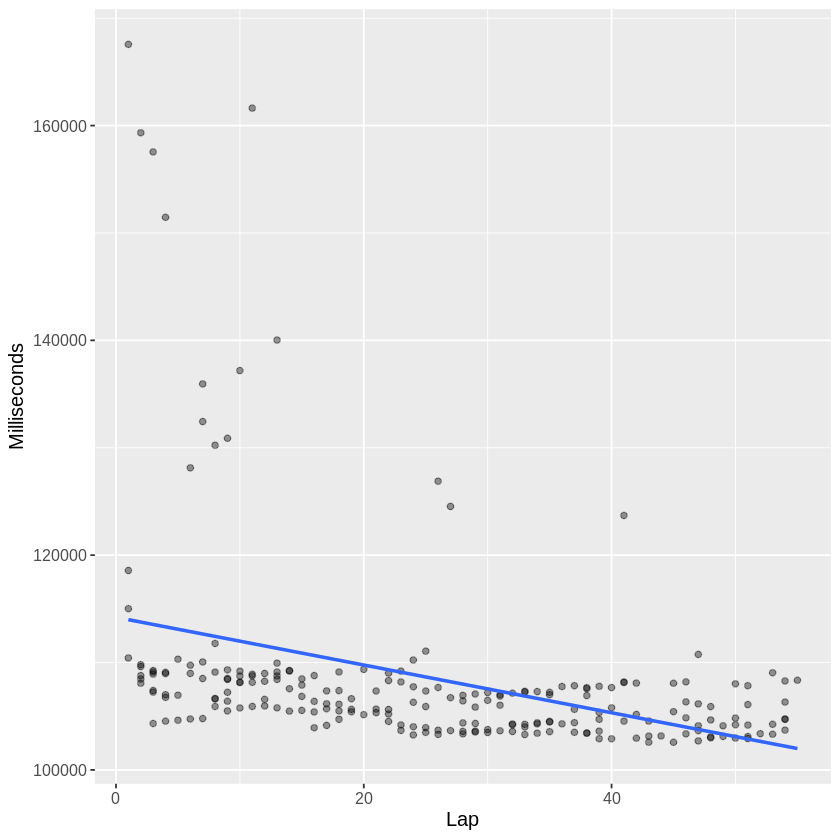

In [26]:
set.seed(2022)

#22. Abu Dhabi

yt_uae <- tauri_lap %>%
                filter(raceId %in% uae_race_ID) 

yt_uae_clean <- yt_uae %>%
                        group_by(raceId) %>%
                        summarize(n = n()) %>%
                        arrange(desc(n)) 
yt_uae_clean
yt_uae_clean_ID <- yt_uae_clean %>%
                        pull(raceId)


### SPLITTING DATA

yt_uae_races <- tauri_lap %>%
                    filter(raceId %in% yt_uae_clean_ID)

formulaone_split <- initial_split(yt_uae_races, prop = 0.75, strata = milliseconds)

initiate_split_data()

### RUNS REGRESSION

initiate_linear_regression()

round_n <- 22

initiate_rmse() 

### GETS PREDICTION

 get_uae_prediction()

## Collection

In [27]:
rmse_col
racetime_col

# write_csv(rmse_col, "yt_rmse.csv")

.metric,.estimator,.estimate,Round
<chr>,<chr>,<dbl>,<dbl>
rmse,standard,8236.6646,1
rmse,standard,7359.8692,2
rmse,standard,5920.2436,3
rmse,standard,24253.7538,4
rmse,standard,1097.0904,5
rmse,standard,9784.3862,6
rmse,standard,1266.0691,7
rmse,standard,13609.2709,8
rmse,standard,7453.4750,9


race_time_milliseconds,race_time_mins,race_time_hrs,Round
<dbl>,<dbl>,<dbl>,<dbl>
5707676,95.12793,1.585465,1
5780952,96.34920,1.605820,2
5445973,90.76622,1.512770,3
5876763,97.94605,1.632434,4
5470469,91.17449,1.519575,5
5978819,99.64698,1.660783,6
6045301,100.75502,1.679250,7
6015735,100.26225,1.671037,8
5646508,94.10847,1.568475,9
